In [2]:
using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# Pkg.add("JuMP")
# Pkg.add("Ipopt")
# Pkg.add("QuadGK")
using DifferentialEquations,Plots,LinearAlgebra,JuMP,Ipopt,QuadGK

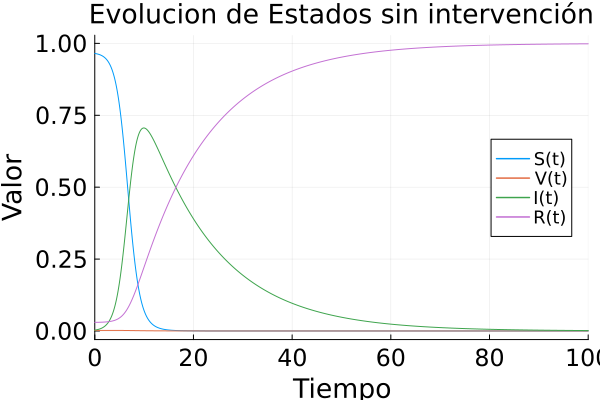

1.0


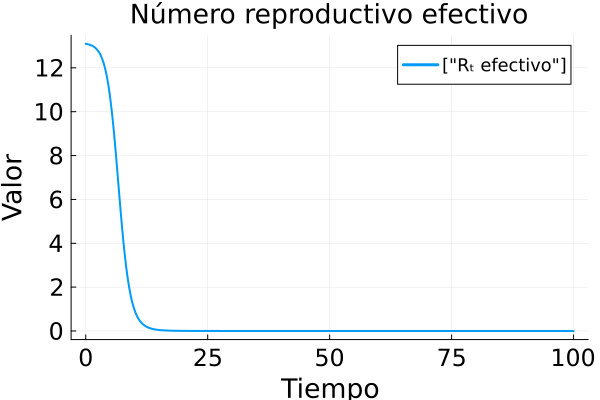

In [4]:
λᵥ = 1
λₚ = 1
S₀ = 0.965
I₀ = 0.003
R₀ = 0.03
V₀ = 0.002
Z₀ = 0.003
β = 0.95
Φ = 0.7
γ = 0.07
T = 100
function system!(dy,y,p,t)
    dy[1] = -β*y[1]*y[3]
    dy[2] = -β*(1-Φ)*y[2]*y[3]
    dy[3] = β*y[1]*y[3] +β*(1-Φ)*y[2]*y[3] - γ*y[3]
    dy[4] = γ*y[3]
end
tspan = (0,T)
ci = [S₀,V₀,I₀,R₀]
prob = ODEProblem(system!,ci,tspan)
sol = solve(prob,Tsit5())
suma= sol(10)[1] + sol(10)[2] + sol(10)[3] + sol(10)[4]
println(suma)
estados = plot(sol,xlabel="Tiempo",ylabel="Valor",label=["S(t)" "V(t)" "I(t)" "R(t)" ],title="Evolucion de Estados sin intervención",titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,
legend=:right)
display(estados)
savefig(estados,"Grafico_Sin_Intervencion.png")
t_valores = 0:0.01:100
plot_r = plot(t_valores,[(β/γ)*sol(t)[1] for t in t_valores],lw=2,label=["Rₜ efectivo"],xlabel="Tiempo",ylabel="Valor",title= "Número reproductivo efectivo", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12)
